<a href="https://colab.research.google.com/github/zihoonkim/practice/blob/main/%EC%AB%84%EB%94%A5_%EC%88%AB%EC%9E%90_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # 텐서플로우 버전 출력

mnist = keras.datasets.mnist

# mnist 데이터 로드, 다운까지 짆애
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train 배열의 크기:", len(x_train))  # x_train 배열의 크기 출력

2.8.0
11501568/11490434 [==============================] - 0s 0us/step
x_train 배열의 크기: 60000


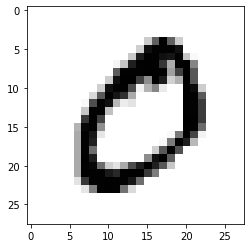

In [2]:
# 숫자 손글씨 이미지 하나 출력
plt.imshow(x_train[1],cmap=plt.cm.binary) #plt.cm.binary 하면 흑백으로 나온다
plt.show()

In [3]:
# y항목에는?
print(y_train[1])

0


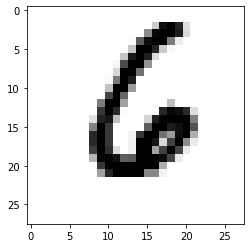

152 번째 이미지의 숫자는 바로  6 입니다.


In [4]:
# index에 0에서 59999 사이의 숫자를 바꿔가면서. 
index=151     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape) # 28x28 크기의 숫자 이미지가 60000- 훈련이미지

(60000, 28, 28)


In [6]:
print(x_test.shape)  # 28x28 크기의 숫자 이미지가 10000 - 테스트 이미지

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0    ## 일반적으로 입력은 0~1사이 값으로
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 딥러닝 네트워크 설계

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary() # 딥러닝 네트워크 모델 확인


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

# 네트워크 학습시키기

In [11]:
# 네트워크 입력은(데이터갯수, 이미지크기 x, 이미지크기 y, 채널수)
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1840 - accuracy: 0.9436
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0619 - accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0353 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

# 얼마나 잘만들었나 확인

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0389 - accuracy: 0.9893 - 1s/epoch - 4ms/step
test_loss: 0.038947273045778275 
test_accuracy: 0.989300012588501


In [14]:
# 98.72점

In [15]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.8631984e-07 7.9153573e-11 2.1076151e-07 7.9373740e-06 1.1725310e-07
 1.2914907e-08 6.3222843e-12 9.9998951e-01 3.7515622e-09 2.0541454e-06]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


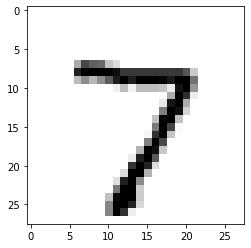

In [16]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.6980654e-07 4.1239465e-10 2.5007779e-08 8.2888156e-02 1.1978896e-05
 6.8135135e-02 1.2235594e-07 5.7397248e-10 1.1594716e-01 7.3301721e-01]
라벨: 5, 예측결과: 9


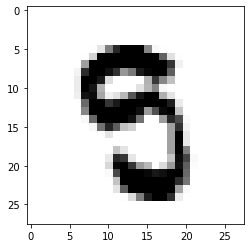

예측확률분포: [3.7802408e-08 9.9767178e-01 1.3216001e-03 9.7759937e-08 6.8985632e-06
 3.3805236e-08 9.9884695e-04 1.3020753e-12 6.5697702e-07 2.4293385e-11]
라벨: 6, 예측결과: 1


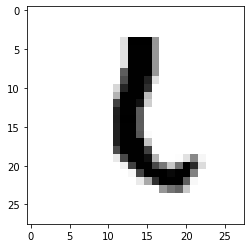

예측확률분포: [5.1131057e-12 9.1566602e-11 2.7353500e-16 1.2830909e-14 9.6952170e-01
 3.6866708e-11 3.4966634e-13 9.6413988e-10 3.6888680e-06 3.0474683e-02]
라벨: 9, 예측결과: 4


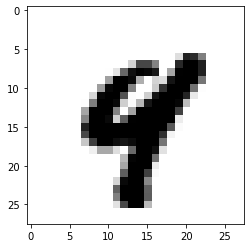

예측확률분포: [2.2823620e-11 2.1370229e-06 4.4831452e-03 8.7188687e-11 9.9539500e-01
 7.7525225e-10 3.6110681e-09 5.2446372e-05 1.0981171e-05 5.6292345e-05]
라벨: 2, 예측결과: 4


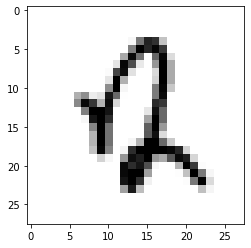

예측확률분포: [1.04105400e-08 1.41864531e-09 2.41689708e-08 1.56965291e-06
 6.34235563e-04 8.73896003e-01 5.77041135e-07 1.27708912e-02
 1.53050013e-03 1.11166306e-01]
라벨: 9, 예측결과: 5


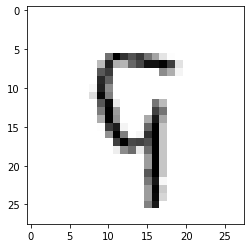

In [17]:
# model이 추론해 낸 숫자와 실제 라벨이 다른 경우는?
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()